# Diabetes Prediction

## **Exploratory Data Analysis**

In [3]:
# Importing the packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action = "ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# Reading the dataset
df = pd.read_csv('diabetes.csv')

In [5]:
# Printing the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Descriptive statistics of the data set
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", df.shape)

Dataset shape: (768, 9)


In [9]:
# Print the classes of the outcome variable.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

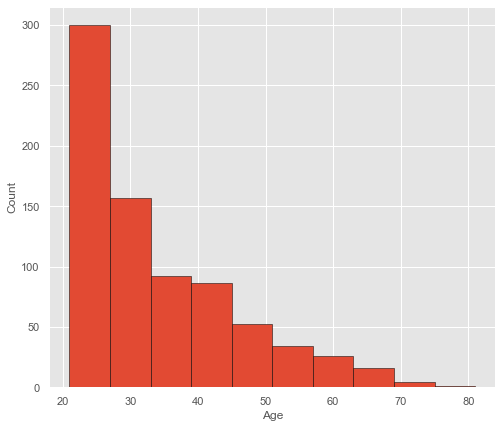

In [10]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
df["Age"].hist(edgecolor = "black");

In [11]:
print("Max Age: " + str(df["Age"].max()) +','+ " Min Age: " + str(df["Age"].min()))

Max Age: 81, Min Age: 21


In [12]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [13]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [14]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [15]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [16]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [17]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [18]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [19]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [20]:
# corr() is used to find the pairwise correlation of all columns in the dataframe
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


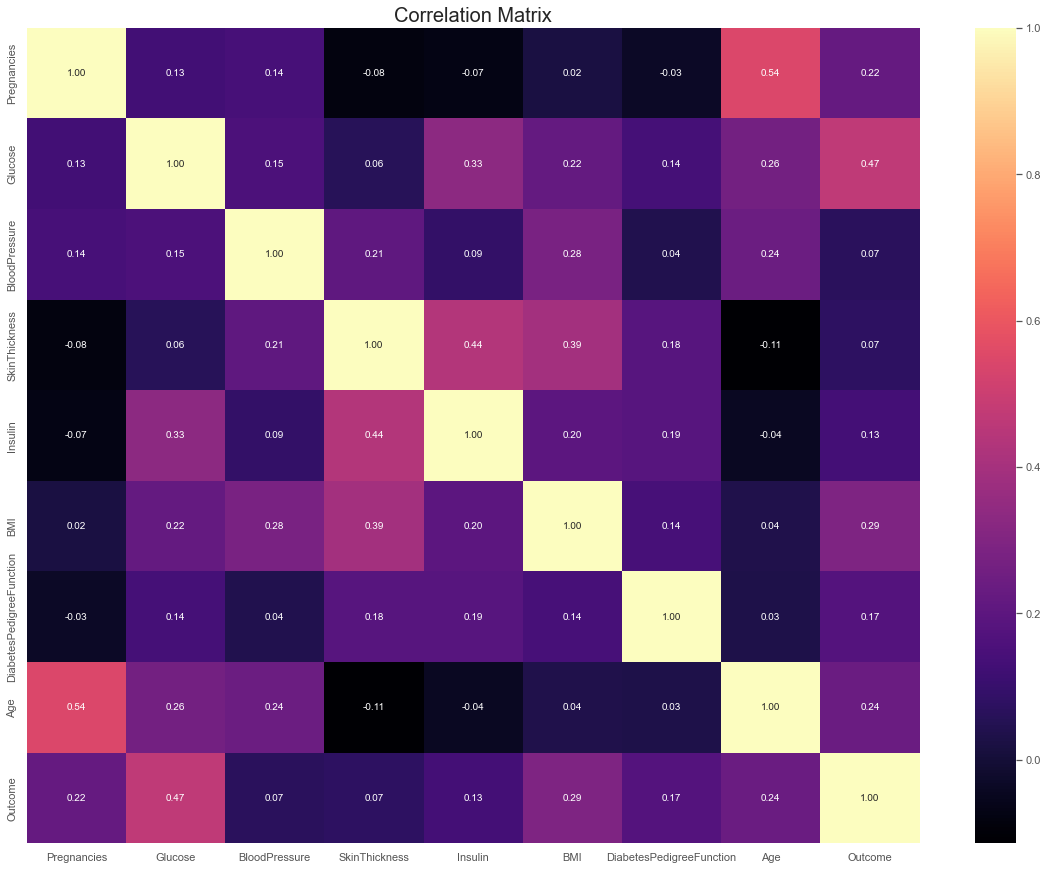

In [21]:
# Correlation matrix of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap ='magma' )
ax.set_title("Correlation Matrix", fontsize=20)
#plt.savefig("corr.png", dpi=400)
plt.show()

## **Data Preprocessing**

## Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value. Below we replace 0 value by NaN:

In [22]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [24]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
# The missing values will be filled with the median values of each variable
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [26]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
# Number of missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outlier Observation Analysis

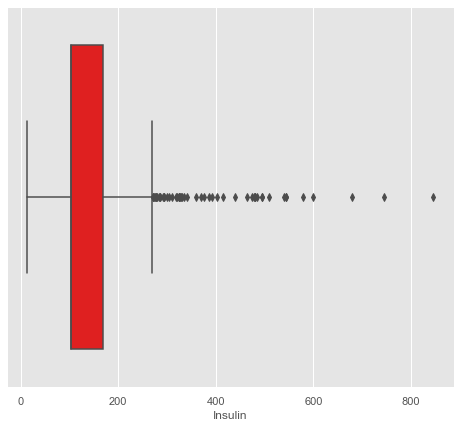

In [29]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="red");

In [30]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

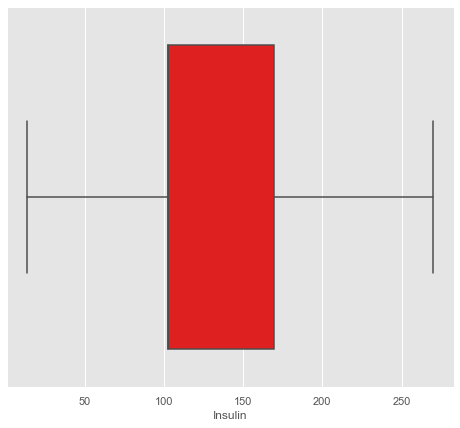

In [31]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="red");

## Local Outlier Factor (LOF)

In [32]:
# Determining the outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [33]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [34]:
# Choosing the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [35]:
# Deleting those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [36]:
# Examining the size of the data.
df.shape

(760, 9)

## Feature Engineering

Creating new variables is important for models. But we need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [37]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
cols = X.columns
index = X.index

In [38]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [40]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [41]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [42]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [43]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
471,0,137.0,70.0,38.0,102.5,33.2,0.170,22
639,1,100.0,74.0,12.0,46.0,19.5,0.149,28
158,2,88.0,74.0,19.0,53.0,29.0,0.229,22
643,4,90.0,70.0,27.0,102.5,28.0,0.610,31
358,12,88.0,74.0,40.0,54.0,35.3,0.378,48
...,...,...,...,...,...,...,...,...
715,7,187.0,50.0,33.0,270.0,33.9,0.826,34
196,1,105.0,58.0,27.0,102.5,24.3,0.187,21
637,2,94.0,76.0,18.0,66.0,31.6,0.649,23
565,2,95.0,54.0,14.0,88.0,26.1,0.748,22


In [44]:
y_train

471    0
639    0
158    0
643    0
358    0
      ..
715    1
196    0
637    0
565    0
692    0
Name: Outcome, Length: 532, dtype: int64

In [45]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
756,7,137.0,90.0,41.0,102.5,32.0,0.391,39
590,11,111.0,84.0,40.0,169.5,46.8,0.925,45
582,12,121.0,78.0,17.0,102.5,26.5,0.259,62
40,3,180.0,64.0,25.0,70.0,34.0,0.271,26
247,0,165.0,90.0,33.0,270.0,52.3,0.427,23
...,...,...,...,...,...,...,...,...
34,10,122.0,78.0,31.0,102.5,27.6,0.512,45
742,1,109.0,58.0,18.0,116.0,28.5,0.219,22
468,8,120.0,74.5,32.0,169.5,30.0,0.183,38
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27


In [46]:
y_test

756    0
590    1
582    0
40     0
247    0
      ..
34     0
742    0
468    1
764    0
362    0
Name: Outcome, Length: 228, dtype: int64

In [47]:
\

# LR

In [48]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [49]:
# model predictions

y_pred = log_reg.predict(X_test)

In [50]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.7838345864661654
0.8157894736842105


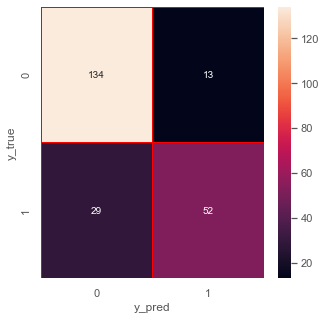

In [51]:
# confusion matrix

cm=confusion_matrix(y_test,y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [52]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       147
           1       0.80      0.64      0.71        81

    accuracy                           0.82       228
   macro avg       0.81      0.78      0.79       228
weighted avg       0.81      0.82      0.81       228



# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# model predictions 

y_pred = knn.predict(X_test)

In [55]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.8796992481203008
0.8903508771929824


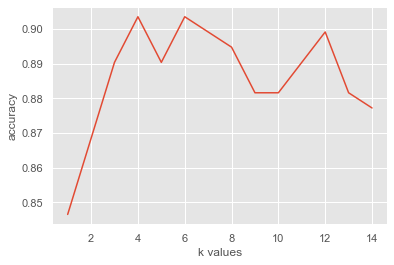

In [56]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
#visualize
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.savefig('plot')
plt.show()

In [57]:
knn_2 = KNeighborsClassifier(n_neighbors=11)
knn_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [58]:
print(accuracy_score(y_train, knn_2.predict(X_train)))

knn2_acc = accuracy_score(y_test, knn_2.predict(X_test))
print(knn2_acc)

0.8740601503759399
0.8903508771929824


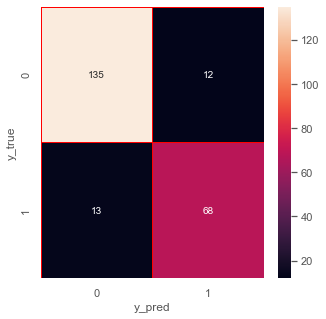

In [59]:
cm=confusion_matrix(y_test,knn_2.predict(X_test))

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [60]:
# classification report

print(classification_report(y_test,knn_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       147
           1       0.85      0.84      0.84        81

    accuracy                           0.89       228
   macro avg       0.88      0.88      0.88       228
weighted avg       0.89      0.89      0.89       228



In [61]:
knn_2.predict([[7,137,90,41,102.5,32,0.391,39]])


array([0], dtype=int64)

# RF

In [62]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier( n_estimators = 150)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [63]:
y_pred = rand_clf.predict(X_test)

In [77]:
# accuracy score
ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.868421052631579


In [65]:
rand_clf.predict([[10,115,0,0,0,35.3,0.134,29]])


array([0], dtype=int64)

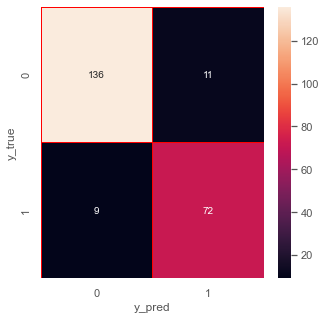

In [66]:
cm=confusion_matrix(y_test,y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [67]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       147
           1       0.87      0.89      0.88        81

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.90       228
weighted avg       0.91      0.91      0.91       228



In [68]:
from xgboost import XGBClassifier

In [69]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

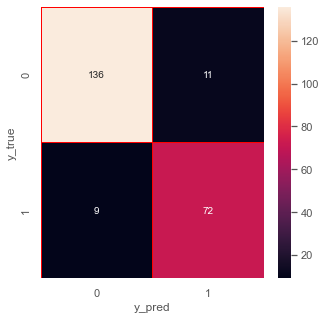

In [70]:
cm=confusion_matrix(y_test,y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [71]:
y_pred = model.predict(X_test)

In [74]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       147
           1       0.80      0.84      0.82        81

    accuracy                           0.87       228
   macro avg       0.85      0.86      0.86       228
weighted avg       0.87      0.87      0.87       228



In [72]:
xg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (xg_accuracy * 100.0))

Accuracy: 86.84%


# Model Comparison

In [70]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest Classifier','XGBClassifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn2_acc,4), 100*round(ran_clf_acc,4),100*round(xg_accuracy,4)
              ]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,90.79
1,KNN,89.04
3,XGBClassifier,86.84
0,Logistic Regression,81.58


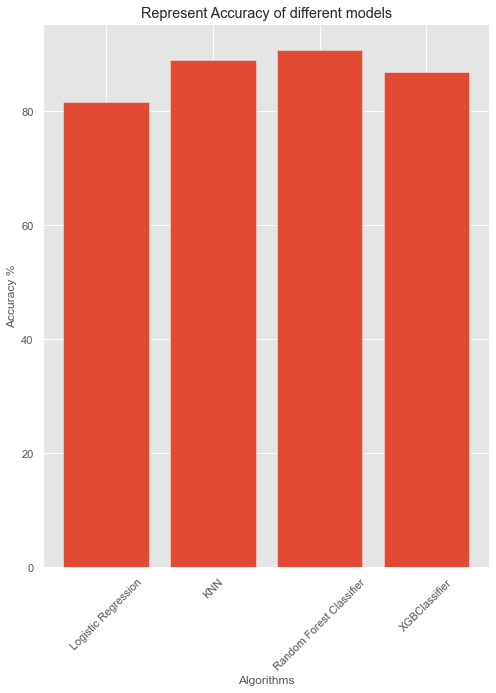

In [71]:
plt.figure(figsize=(8,10))
plt.title("Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.bar(models['Model'],models['Score'])
plt.show()

In [72]:
import pickle
model = rand_clf
pickle.dump(model, open("diabetes.pkl",'wb'))